# OOPython

Задача 2. Численное дифференцирование.

Борисов Дмитрий, 373гр.

### 1. Создадим абстрактный класс численного дифференцирования, хранящий в себе функцию и шаг дифференцирования. 
#### А также реализуем на нем иерархию классов для 5-ти формул численного дифференцирования, в потомках определим метод вызова --call--

In [1]:
class AbstractDerivative:
    def __init__(self, function, step = 1e-5):
        self._function = function
        self._step = float(step)
        
    def __call__(self, x):
        raise NotImplementedError
        
class ForwardDerivative(AbstractDerivative):
    __MethodName = 'Forward 1st Order Derivative'
    def getName(self):
        return self.__MethodName

    def __call__(self, x):
        return (self._function(x + self._step) - self._function(x)) / self._step

class BackwardDerivative(AbstractDerivative):
    __MethodName = 'Backward 1st Order Derivative'
    def getName(self):
        return self.__MethodName
 
    def __call__(self, x):
        return (self._function(x) - self._function(x - self._step)) / self._step

class CentralDerivative(AbstractDerivative):
    __MethodName = 'Central 2nd Order Derivative'
    def getName(self):
        return self.__MethodName

    def __call__(self, x):
        return (self._function(x + self._step) - self._function(x - self._step)) / (2 * self._step)
    
class FourthDerivative(AbstractDerivative):
    __MethodName = 'Symmetric 4th Order Derivative'
    def getName(self):
        return self.__MethodName

    def __call__(self, x):
        return 4. / 3 * (self._function(x + self._step) - self._function(x - self._step)) / (2 * self._step) \
    - 1. / 3 * (self._function(x + 2 * self._step) - self._function(x - 2 * self._step)) / (4 * self._step)
    
class FifthDerivative(AbstractDerivative):
    __MethodName = 'Symmetric 6th Order Derivative'
    def getName(self):
        return self.__MethodName

    def __call__(self, x):
        return 3. / 2 * (self._function(x + self._step) - self._function(x - self._step)) / (2 * self._step) \
    - 3. / 5 * (self._function(x + 2 * self._step) - self._function(x - 2 * self._step)) / (4 * self._step) \
    + 1. / 10 * (self._function(x + 3 * self._step) - self._function(x - 3 * self._step)) / (6 * self._step)

### 2. Вычисления.

#### Составление символьный функций, их дифференцирование

In [2]:
import sympy as smp
xSym = smp.Symbol('x')
listOfSymbolicFunctions = [smp.sin(xSym**2), smp.cos(smp.sin(xSym)), smp.exp(smp.cos(smp.sin(xSym))), \
                           smp.log(xSym + 3), (xSym + 3)**(0.5)] 

listOfFunctions = [smp.lambdify(xSym, f) for f in listOfSymbolicFunctions]

listOfSymbolicDerivatives = [smp.diff(f, xSym) for f in listOfSymbolicFunctions]
listOfAnaliticalDerivatives = [smp.lambdify(xSym, f) for f in listOfSymbolicDerivatives]

#### Расчет численного дифференцирования и погрешностей, построение графиков

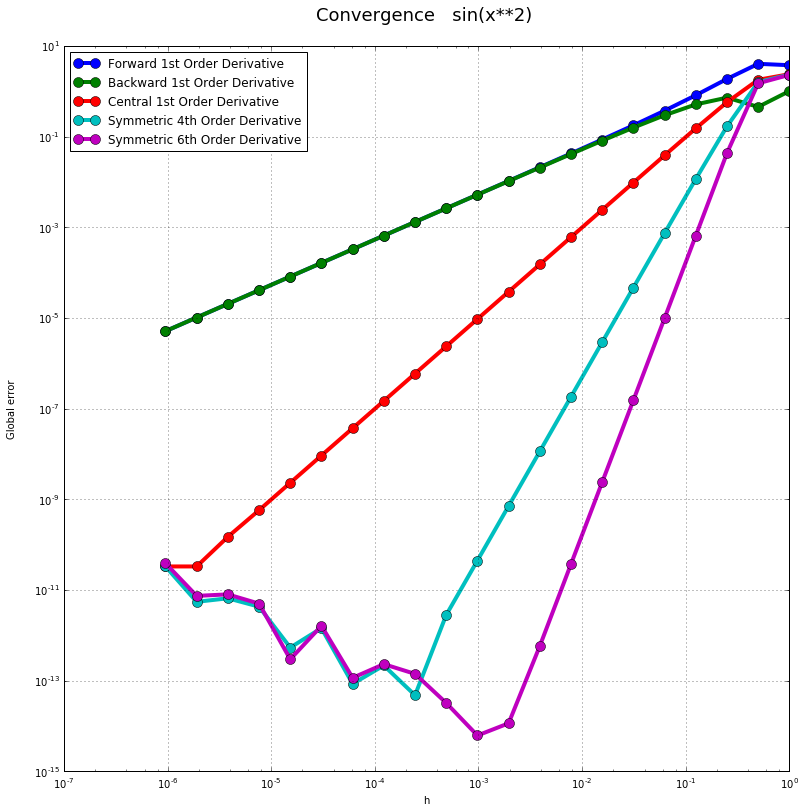

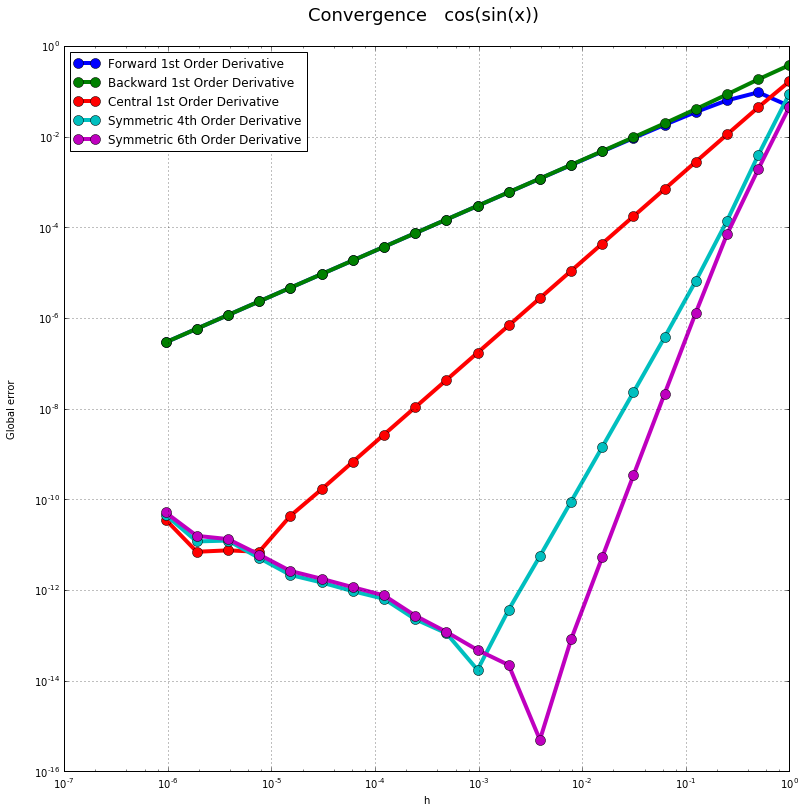

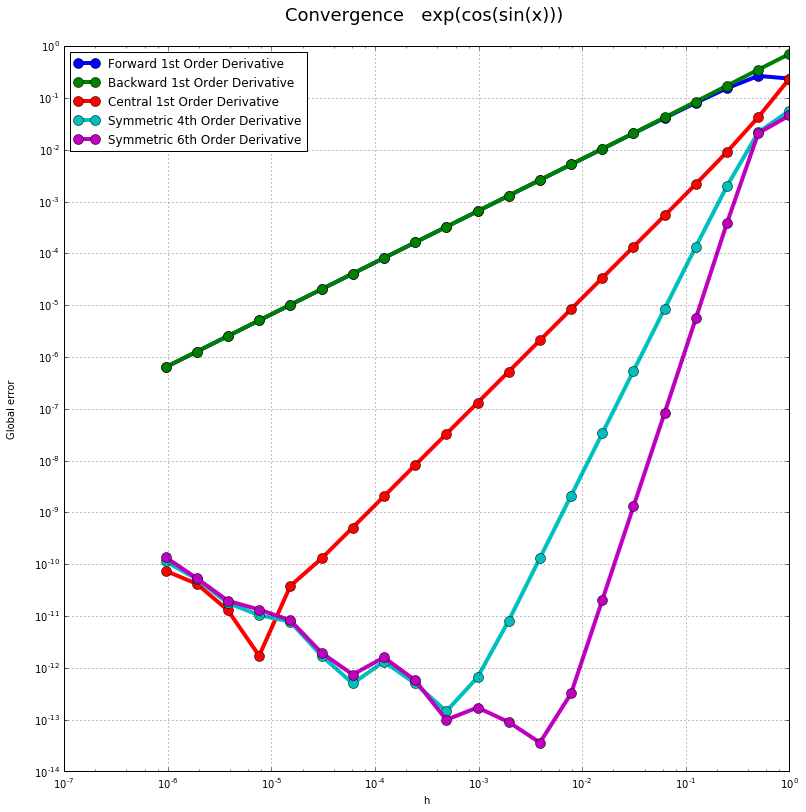

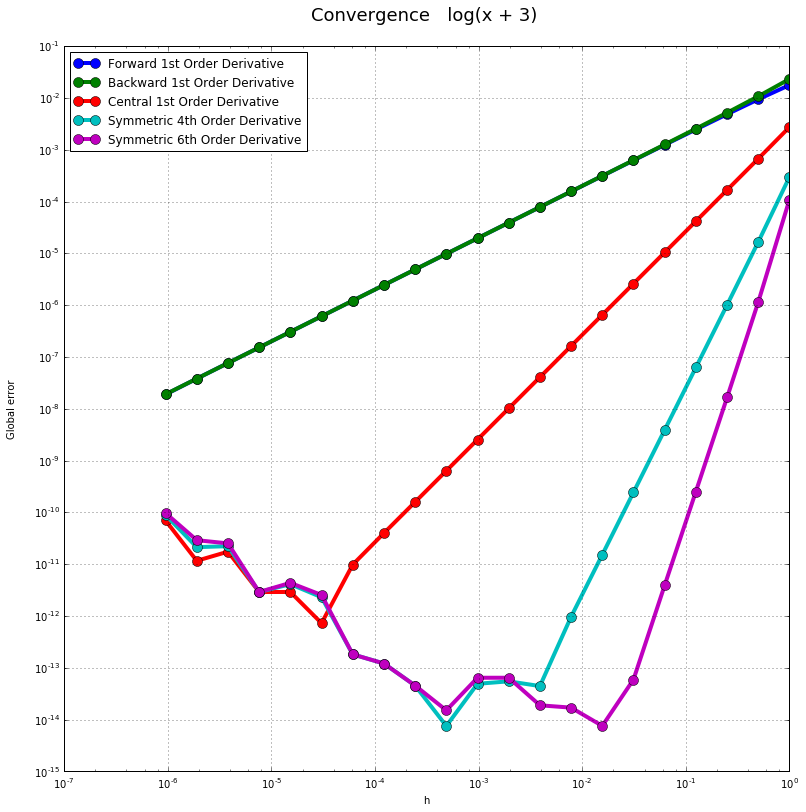

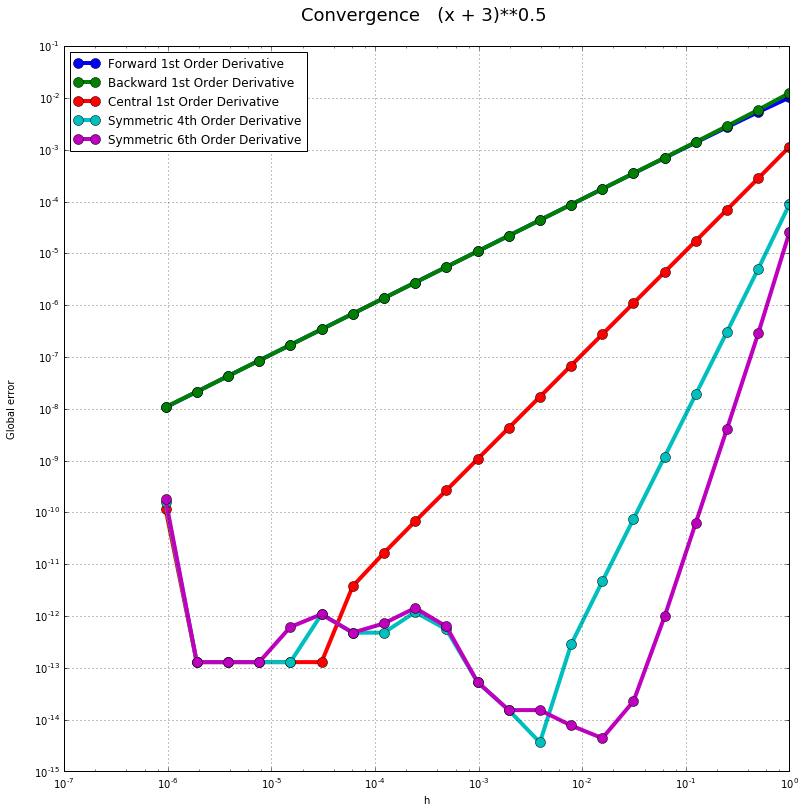

In [5]:
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

listOfSteps = [2**(1 - n) for n in range(1, 22)]
x0 = 2.

for function, analiticalDerivative, symbolicFunction in \
    zip(listOfFunctions, listOfAnaliticalDerivatives, listOfSymbolicFunctions):
    
    plt.figure(figsize=(13, 13))
    plt.title('Convergence   ' + str(symbolicFunction) + ' \n', fontsize=18)
    plt.xlabel('h')
    plt.ylabel('Global error\n')
    plt.grid('on')
    
    listOfErrors = [[],[],[],[],[]]
    for h in listOfSteps:
        
        ListOfNumericDerivates = (ForwardDerivative(function, h), BackwardDerivative(function, h), \
                                  CentralDerivative(function, h), FourthDerivative(function, h), \
                                  FifthDerivative(function, h))
        
        for numericalDerivative, errorList in zip(ListOfNumericDerivates, listOfErrors):
            error = m.fabs(numericalDerivative(x0) - analiticalDerivative(x0))
            errorList.append(error)
    
    for numericalDerivative, errorList in zip(ListOfNumericDerivates, listOfErrors):
        plt.loglog(listOfSteps, errorList, '-o', markersize=10, linewidth = 4, label = numericalDerivative.getName())
        plt.legend (loc='upper left')
    
    plt.show()